# Running GRASS in Jupyter Notebooks in Windows

## Set Up

On Windows, we need to launch GRASS then launch Jupyter Lab within GRASS. This is a little more complex than Linux and Mac where we can just launch Jupyter Lab directly from the command line without starting GRASS first. Follow the directions below to setup Jupyter and GRASS in Windows.

##### *1. Install GRASS 8.3*
> Install GRASS 8.3 (dev) with the standalone installer from [here](https://grass.osgeo.org/download/windows/).

##### *2. Launch GRASS GIS as Administrator*
> Launch GRASS GIS as Admin by right clicking on GRASS from the Windows start up menu and selecting "Run as Administrator". If you don't see this option, go to "More" then select "Open File Location". In the new File Explorer window that opens, right click on GRASS GIS and select "Run as Administrator".

##### *3. Install Jupyter Lab*
>Next, we'll need to install Jupyter Lab (which contains Jupyter Notebook along with some additional functionality like being able to browse directories). Installing Jupyter Lab is easy since we have Pip installed with GRASS GIS. In the terminal that has launched with GRASS, run:
>
>`python -m pip install jupyterlab`

##### *4. Close GRASS GIS and Relaunch GRASS GIS*
> Now that we've installed Jupyter Lab, we quit GRASS GIS with the `exit` command then re-open it from the Window's start up menu (no need to run as an administrator this time).

##### *3. Add GRASS to path variables*
> In the command prompt window that opens with GRASS's launch, add GRASS 8.3 to the path variables:
>
> `set PATH=%PATH%;C:\Program Files\GRASS GIS 8.3\`

##### *6. Launch Jupyter Lab*
>We're ready to launch jupyterlab now:
>
>`python -m jupyter lab`
>
>This should launch jupyter lab in a your default web browser. Use the left side panel to navigate to the notebook you wish to run and you're ready to go!

##### *7. Launching Jupyter Lab in the Future*
>To launch Jupyter Lab from GRASS in the future:
>1. Open GRASS Command Line
>2. Add GRASS to path variables with :`set PATH=%PATH%;C:\Program Files\GRASS GIS 8.3\`
>3. Launch jupyter lab with `python -m jupyter lab`


## Start

When using Python in notebook, we usually find GRASS GIS Python packages, import them, initialize GRASS GIS session, and set several variables useful for using GRASS GIS in a notebook.

In [3]:
# Import Python standard library and IPython packages we need.
import os
import sys
import subprocess
from IPython.display import Image

# Ask GRASS GIS where its Python packages are.
grass_call = "grass80"
sys.path.append(
    subprocess.check_output([grass_call, "--config", "python_path"], text=True, shell=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Create a GRASS GIS session.
gj.init("./data", "nc_spm_08_grass7", "user1")

## Using GRASS

Now that we have GRASS GIS running in our notebook, let's try some basic commands. 

In this section, we create an elevation map from the sample GRASS GIS dataset for North Carolina, USA. 

First, we set computational region.

In [4]:
# Set computational region to the study area.
gs.parse_command('g.region', raster="elevation", flags='pg')
# Set colors for elevation raster
gs.run_command('r.colors', map="elevation", color="elevation")

Then, we'll make our first map.

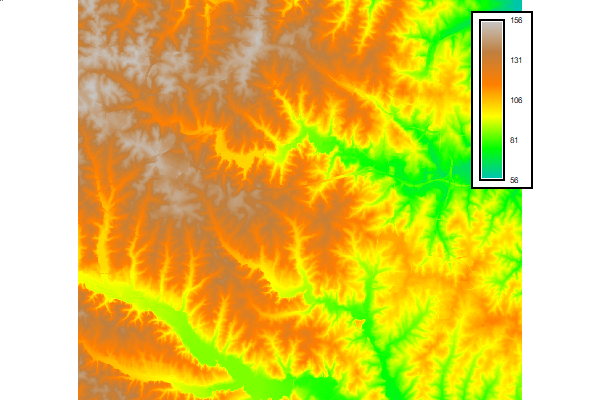

In [5]:
# Create GrassRenderer instance
img = gj.GrassRenderer()
# Add a raster, vector and legend to the map
img.d_rast(map="elevation")
img.d_legend(raster="elevation", at=(55, 95, 80, 84), flags="b")
# Display map
img.show()

Now, we're up and running! It may be useful to copy the paths from Step 7 somewhere easy to find for the future.